<a href="https://colab.research.google.com/github/kevin-loaiza/senales_y_sistemas/blob/main/Pacial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Se tiene unmicroprocesador de 5 bits con entrada analoga de-3.3 a 5[v]. Diseñe el sistema de acondicionamiento y digitlizacion para la señal: x(t) = 20sin(7t-π/2)-3cos(5t)+2cos(10t). Presente las simulaciones y graficas de los procedimientos mas representativos en un cuaderno de Python, incluyendo al menos dos perıodos de la señal estudiada.

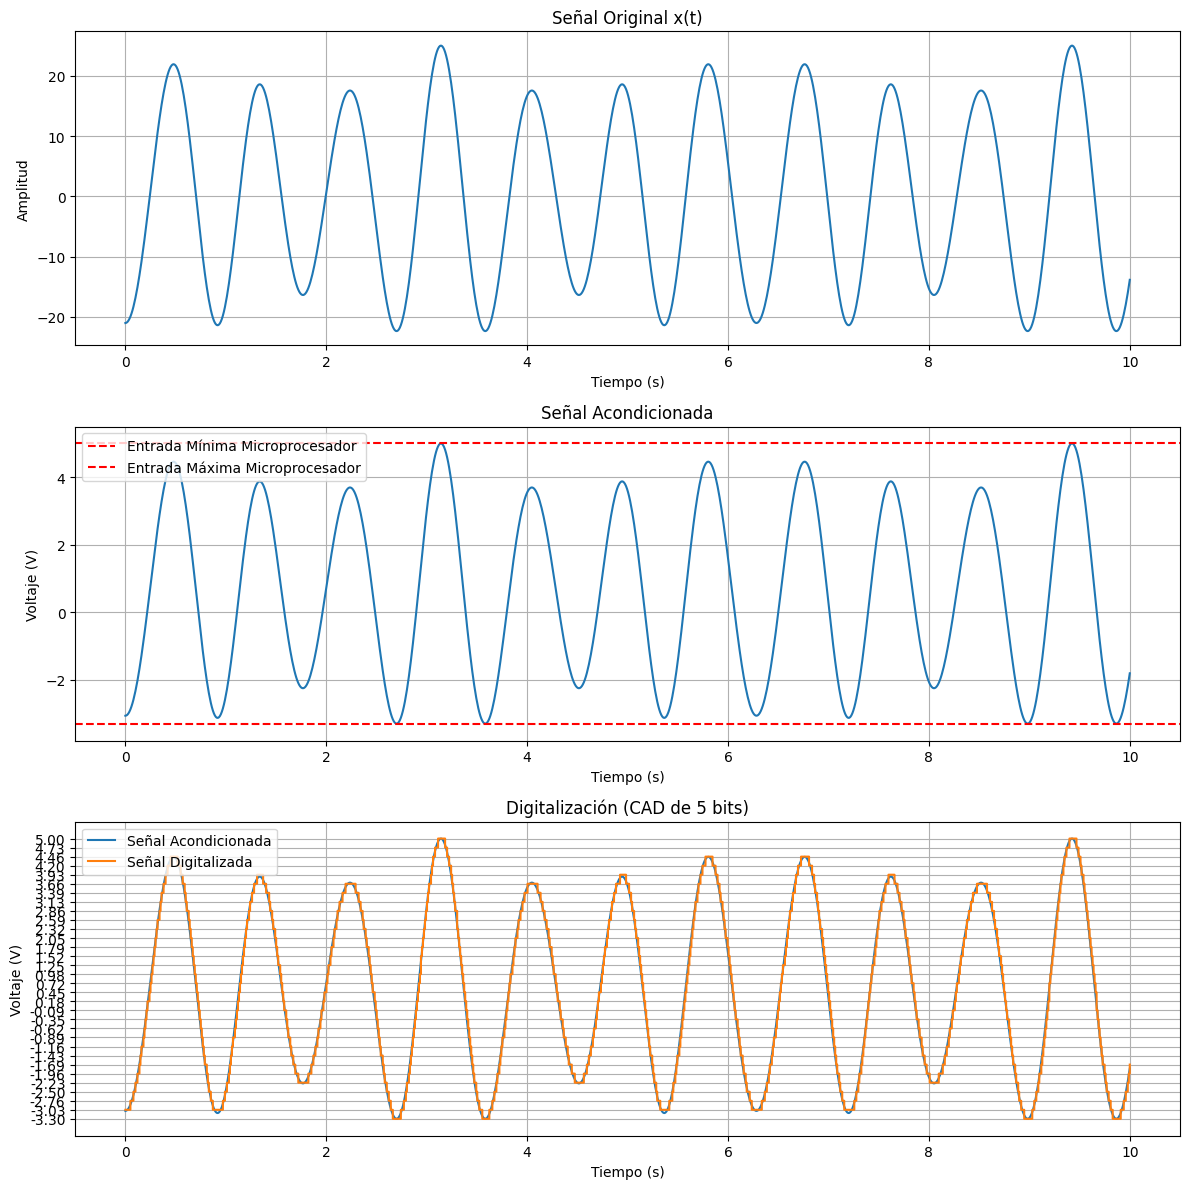

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define la señal x(t)
def signal_xt(t):
    return 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t)

# Genera el vector de tiempo (ajusta el rango y el número de puntos según sea necesario)
# Para obtener al menos dos períodos, necesitamos considerar las frecuencias (7, 5, 10).
# El período fundamental estará relacionado con el MCM de (2*pi/7, 2*pi/5, 2*pi/10).
# Para simplificar, elijamos un rango de tiempo que parezca razonable para la visualización.
t = np.linspace(0, 10, 1000) # Ejemplo de rango de tiempo y número de puntos

# Calcula la señal original
original_signal = signal_xt(t)

# --- Acondicionamiento de la Señal ---

# Determina el mínimo y el máximo de la señal original
min_original = np.min(original_signal)
max_original = np.max(original_signal)

# Rango de entrada del microprocesador
min_entrada = -3.3
max_entrada = 5.0

# Calcula el factor de escalado y el offset
# Mapea el rango [min_original, max_original] al rango [min_entrada, max_entrada]
# Factor de escalado: (max_entrada - min_entrada) / (max_original - min_original)
# Offset: min_entrada - factor_escalado * min_entrada

scaling_factor = (max_entrada - min_entrada) / (max_original - min_original)
offset = min_entrada - scaling_factor * min_original

conditioned_signal = scaling_factor * original_signal + offset

# --- Digitalización (CAD de 5 bits) ---

#numero de bits
bits= 5
cant_niveles = 2**bits


# Tamaño del paso para cada nivel en el rango de entrada
step_size = (max_entrada - min_entrada) / (cant_niveles - 1)

# Niveles de cuantización
quantizacion_niveles = np.linspace(min_entrada, max_entrada, cant_niveles)

# Proceso de digitalización
digitized_signal = np.zeros_like(conditioned_signal)
for i, value in enumerate(conditioned_signal):
    # Encuentra el nivel de cuantización más cercano
    closest_level_index = np.argmin(np.abs(quantizacion_niveles - value))
    digitized_signal[i] = quantizacion_niveles[closest_level_index]

# --- Graficar ---

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(t, original_signal)
plt.title('Señal Original x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, conditioned_signal)
plt.title('Señal Acondicionada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.ylim(min_entrada - 0.5, max_entrada + 0.5) # Mostrar el rango de entrada
plt.axhline(min_entrada, color='r', linestyle='--', label='Entrada Mínima Microprocesador')
plt.axhline(max_entrada, color='r', linestyle='--', label='Entrada Máxima Microprocesador')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, conditioned_signal, label='Señal Acondicionada')
plt.step(t, digitized_signal, where='post', label='Señal Digitalizada')
plt.title('Digitalización (CAD de 5 bits)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.ylim(min_entrada - 0.5, max_entrada + 0.5) # Mostrar el rango de entrada
plt.yticks(quantizacion_niveles, [f'{level:.2f}' for level in quantizacion_niveles]) # Mostrar niveles de cuantización en el eje Y
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

2. Cual es la señal obtenida en tiempo discreto al utilizar un conversor analogo digital con frecuencia de muestreo de 5kHz, aplicado a la señal x(t) = 3cos(1000πt) + 5sin(2000πt) + 10cos(11000πt)?. Realizar la simulacion del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

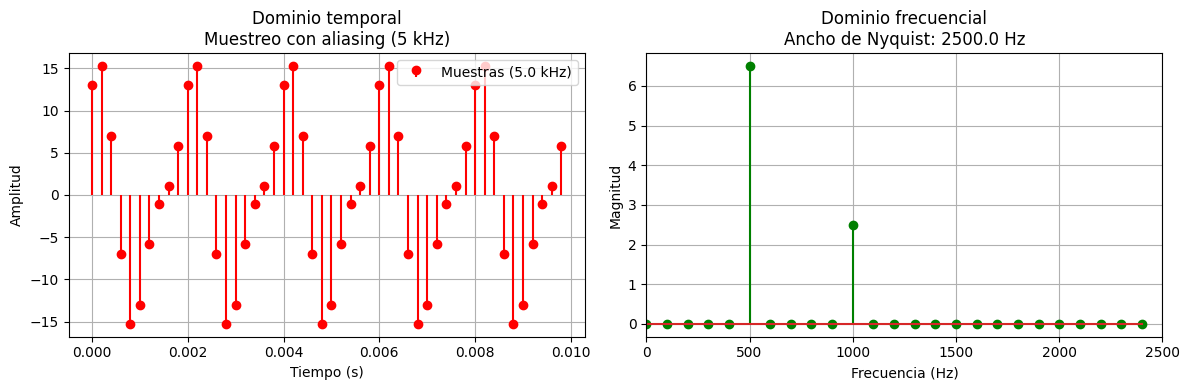

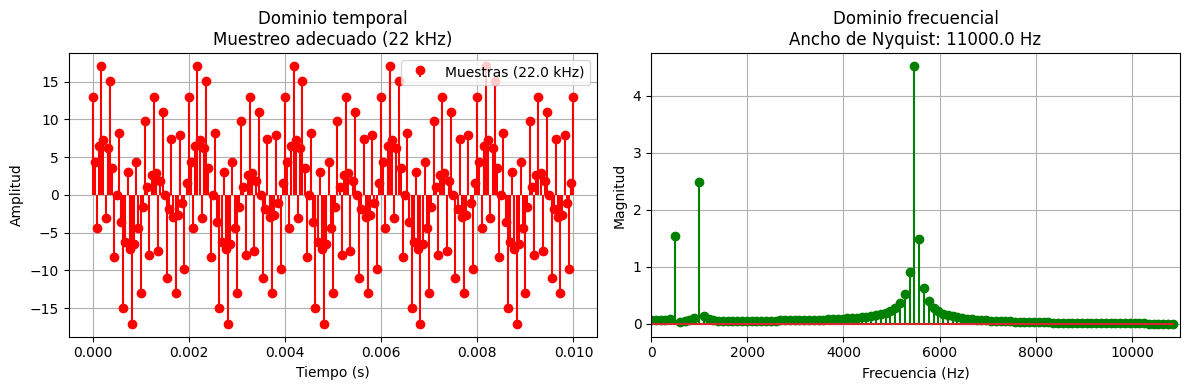

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros de la señal
f1, f2, f3 = 500, 1000, 5500  # Frecuencias en Hz
amplitudes = [3, 5, 10]
fs_insuficiente = 5000  # Frecuencia de muestreo insuficiente (5 kHz)
fs_adecuada = 22000     # Frecuencia de muestreo adecuada (12 kHz)
duration = 0.01         # 10 ms de duración

# Función para generar y analizar la señal
def analizar_muestreo(fs, title):
    # Tiempo de muestreo
    t = np.arange(0, duration, 1/fs)

    # Señal muestreada
    x = (amplitudes[0] * np.cos(2*np.pi*f1*t) +
         amplitudes[1] * np.sin(2*np.pi*f2*t) +
         amplitudes[2] * np.cos(2*np.pi*f3*t))

    # FFT
    N = len(t)
    freq = fftfreq(N, 1/fs)[:N//2]
    X = np.abs(fft(x)[:N//2]) / N

    # Gráficos
    plt.figure(figsize=(12, 4))

    # Dominio del tiempo
    plt.subplot(1, 2, 1)
    t_cont = np.linspace(0, duration, 1000)
    x_cont = (amplitudes[0] * np.cos(2*np.pi*f1*t_cont) +
              amplitudes[1] * np.sin(2*np.pi*f2*t_cont) +
              amplitudes[2] * np.cos(2*np.pi*f3*t_cont))

    plt.stem(t, x, 'r', markerfmt='ro', basefmt=" ", linefmt='r-', label=f'Muestras ({fs/1000} kHz)')
    plt.title(f'Dominio temporal\n{title}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)

    # Dominio de la frecuencia
    plt.subplot(1, 2, 2)
    plt.stem(freq, X, 'g')
    plt.title(f'Dominio frecuencial\nAncho de Nyquist: {fs/2} Hz')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.xlim(0, fs/2)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Análisis con frecuencia insuficiente (5 kHz)
analizar_muestreo(fs_insuficiente, "Muestreo con aliasing (5 kHz)")

# Análisis con frecuencia adecuada (12 kHz)
analizar_muestreo(fs_adecuada, "Muestreo adecuado (22 kHz)")


La distancia media entre dos senales $ x1(t), x2(t) ∈ R, C$, se
puede expresar a partir de la potencia media:

$d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} |x_1(t) - x_2(t)|^2 dt.$

Sean $x1(t)$ y $x2(t)$:

$x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = \frac{2\pi}{T}, \quad T, A \in \mathbb{R}^+$


$x_2(t)$ = \begin{cases}
1 & \text{si } 0 \leq t < \frac{T}{4} \\
-1 & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \text{si } \frac{3T}{4} \leq t < T
\end{cases}

¿Cual es la distancia media entre las señales?. Corrobore sus
desarrollos con Sympy.